In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
data= pd.read_csv("daily_cp_activity_dataset.csv")
data

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.27,0.57,0.00
1,2021-05-02,927,19.88,0.55,0.00
2,2021-05-03,40,16.88,0.60,0.00
3,2021-05-04,51,21.88,0.53,0.00
4,2021-05-05,50,21.11,0.54,0.00
...,...,...,...,...,...
756,2023-05-27,70,19.22,0.56,0.00
757,2023-05-28,76,27.26,0.64,0.41
758,2023-05-29,73,NaN,0.62,0.80
759,2023-05-30,81,18.35,0.57,0.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     761 non-null    object 
 1   courier_partners_online  761 non-null    int64  
 2   temperature              731 non-null    float64
 3   relative_humidity        761 non-null    float64
 4   precipitation            756 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 29.9+ KB


In [4]:
data.isnull().sum()

date                        0
courier_partners_online     0
temperature                30
relative_humidity           0
precipitation               5
dtype: int64

In [5]:
#datatypes are string

In [6]:
data.sample(5)

,date,courier_partners_online,temperature,relative_humidity,precipitation
16,2021-05-17,47,14.97,0.63,0.40
117,2021-08-26,58,25.02,0.60,4.48
409,2022-06-14,73,16.05,0.61,0.44
624,2023-01-15,53,-7.07,0.94,8.52
226,2021-12-13,55,9.27,0.84,2.98


In [7]:
data['date']=pd.to_datetime(data['date'])
data

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.27,0.57,0.00
1,2021-05-02,927,19.88,0.55,0.00
2,2021-05-03,40,16.88,0.60,0.00
3,2021-05-04,51,21.88,0.53,0.00
4,2021-05-05,50,21.11,0.54,0.00
...,...,...,...,...,...
756,2023-05-27,70,19.22,0.56,0.00
757,2023-05-28,76,27.26,0.64,0.41
758,2023-05-29,73,NaN,0.62,0.80
759,2023-05-30,81,18.35,0.57,0.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     761 non-null    datetime64[ns]
 1   courier_partners_online  761 non-null    int64         
 2   temperature              731 non-null    float64       
 3   relative_humidity        761 non-null    float64       
 4   precipitation            756 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 29.9 KB


In [9]:
#now timestamp is converted to datetime datatype

In [10]:
data.describe()

,date,courier_partners_online,temperature,relative_humidity,precipitation
count,761,761.000000,731.000000,761.000000,756.000000
mean,2022-05-16 00:00:00,72.417871,17.532585,0.653193,0.914735
min,2021-05-01 00:00:00,34.000000,-9.980000,0.430000,0.000000
25%,2021-11-07 00:00:00,58.000000,10.930000,0.520000,0.000000
50%,2022-05-16 00:00:00,66.000000,18.630000,0.590000,0.000000
75%,2022-11-22 00:00:00,72.000000,24.410000,0.790000,0.910000
max,2023-05-31 00:00:00,1506.000000,37.950000,1.000000,12.900000
std,NaN,96.039679,10.007564,0.171553,1.749988


In [11]:
x=data['temperature'].mean()
y=data['precipitation'].mean()
data['temperature'].fillna(x,inplace=True)
data['precipitation'].fillna(y,inplace=True)
data

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.270000,0.57,0.00
1,2021-05-02,927,19.880000,0.55,0.00
2,2021-05-03,40,16.880000,0.60,0.00
3,2021-05-04,51,21.880000,0.53,0.00
4,2021-05-05,50,21.110000,0.54,0.00
...,...,...,...,...,...
756,2023-05-27,70,19.220000,0.56,0.00
757,2023-05-28,76,27.260000,0.64,0.41
758,2023-05-29,73,17.532585,0.62,0.80
759,2023-05-30,81,18.350000,0.57,0.00


In [12]:
data.isnull().sum()

date                       0
courier_partners_online    0
temperature                0
relative_humidity          0
precipitation              0
dtype: int64

In [13]:
#Hence null values are replaced by mean

<Axes: >

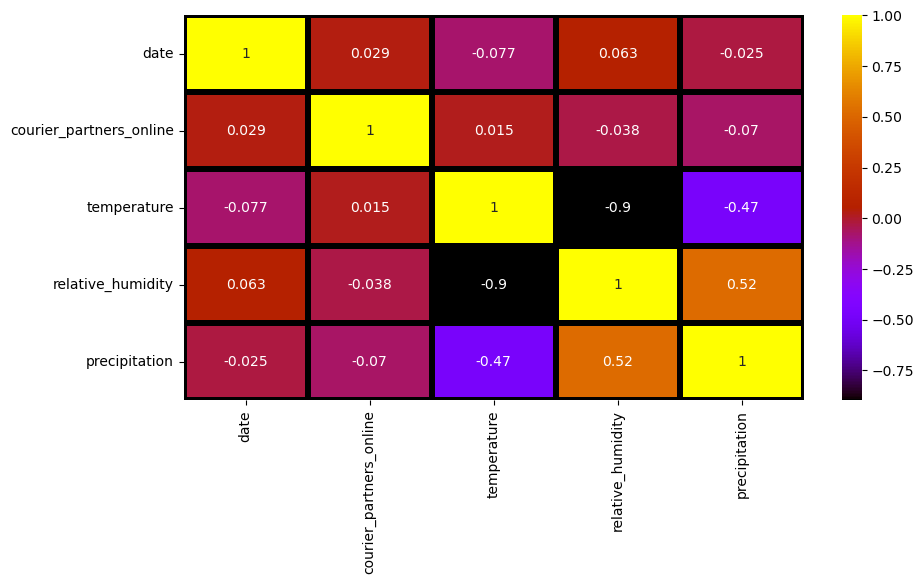

In [14]:
plt.figure(figsize=(10,5))
data.corr()
sns.heatmap(data.corr(),linewidth=4,cmap='gnuplot',linecolor='k',annot=True)

In [15]:
#temperature is highly correlated to humidity
#humidity and precipitation is also correlated

# Detecting outliers

<Axes: >

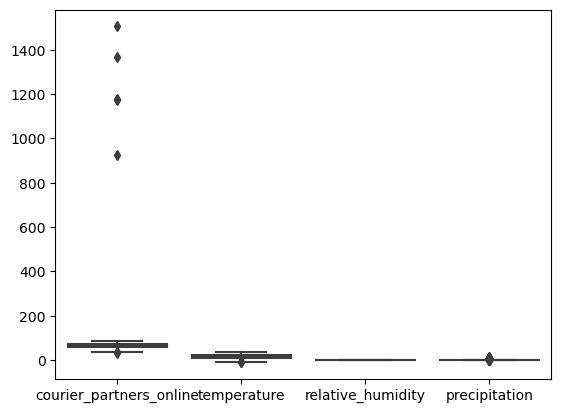

In [16]:
sns.boxplot(data)

In [17]:
#outliers can be seen in courier partner online column

In [18]:
from sklearn.ensemble import IsolationForest
iso_forest=IsolationForest(n_estimators=100,contamination=0.01)
data['outliers']=iso_forest.fit_predict(data[['courier_partners_online']])
data

,date,courier_partners_online,temperature,relative_humidity,precipitation,outliers
0,2021-05-01,49,18.270000,0.57,0.00,1
1,2021-05-02,927,19.880000,0.55,0.00,-1
2,2021-05-03,40,16.880000,0.60,0.00,1
3,2021-05-04,51,21.880000,0.53,0.00,1
4,2021-05-05,50,21.110000,0.54,0.00,1
...,...,...,...,...,...,...
756,2023-05-27,70,19.220000,0.56,0.00,1
757,2023-05-28,76,27.260000,0.64,0.41,1
758,2023-05-29,73,17.532585,0.62,0.80,1
759,2023-05-30,81,18.350000,0.57,0.00,1


In [19]:
print(data['outliers'].value_counts())

outliers
 1    753
-1      8
Name: count, dtype: int64


# Replacing outliers using IQR method

In [20]:
median_value = data['courier_partners_online'].median()
# Calculate the IQR
Q1 = data['courier_partners_online'].quantile(0.25)
Q3 = data['courier_partners_online'].quantile(0.75)

IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +1.5 * IQR

# Replace outliers with the median
data.loc[(data['courier_partners_online'] < lower_bound) | (data['courier_partners_online'] > upper_bound), 'courier_partners_online'] = median_value
data.drop(columns=['outliers'],inplace=True)

In [21]:
data

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.270000,0.57,0.00
1,2021-05-02,66,19.880000,0.55,0.00
2,2021-05-03,40,16.880000,0.60,0.00
3,2021-05-04,51,21.880000,0.53,0.00
4,2021-05-05,50,21.110000,0.54,0.00
...,...,...,...,...,...
756,2023-05-27,70,19.220000,0.56,0.00
757,2023-05-28,76,27.260000,0.64,0.41
758,2023-05-29,73,17.532585,0.62,0.80
759,2023-05-30,81,18.350000,0.57,0.00


Extracting relevant features

In [22]:
data.sort_values(by='date',inplace=True)

lag_intervals = [1,7,14]

for lag in lag_intervals:
    data[f'partners_online_lag{lag}']=data['courier_partners_online'].shift(lag)
#data.dropna(inplace=True)   

In [23]:
data

,date,courier_partners_online,temperature,relative_humidity,precipitation,partners_online_lag1,partners_online_lag7,partners_online_lag14
0,2021-05-01,49,18.270000,0.57,0.00,NaN,NaN,NaN
1,2021-05-02,66,19.880000,0.55,0.00,49.0,NaN,NaN
2,2021-05-03,40,16.880000,0.60,0.00,66.0,NaN,NaN
3,2021-05-04,51,21.880000,0.53,0.00,40.0,NaN,NaN
4,2021-05-05,50,21.110000,0.54,0.00,51.0,NaN,NaN
...,...,...,...,...,...,...,...,...
756,2023-05-27,70,19.220000,0.56,0.00,68.0,74.0,70.0
757,2023-05-28,76,27.260000,0.64,0.41,70.0,71.0,73.0
758,2023-05-29,73,17.532585,0.62,0.80,76.0,72.0,75.0
759,2023-05-30,81,18.350000,0.57,0.00,73.0,78.0,76.0


# Autoregressive Integrated Moving Average(ARIMA)

In [24]:
d1=data.head(200)

<Axes: >

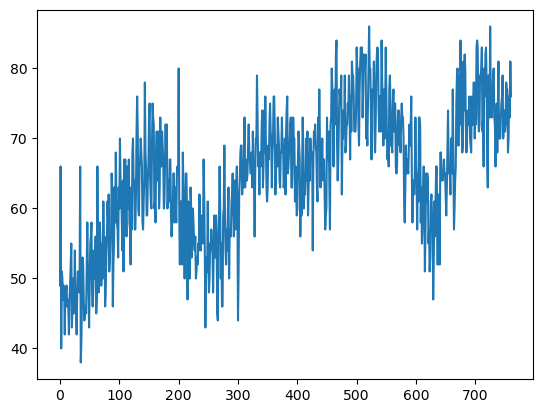

In [25]:
data['courier_partners_online'].plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

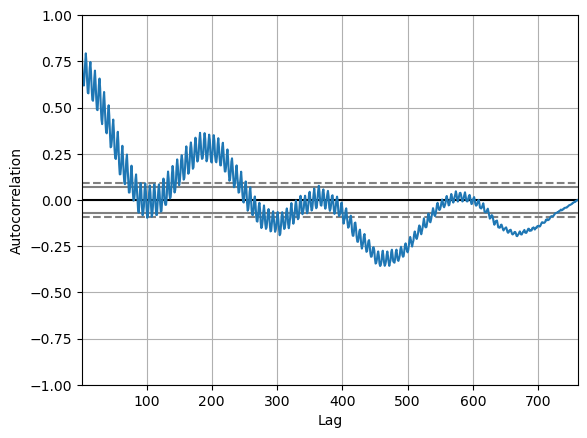

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['courier_partners_online'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

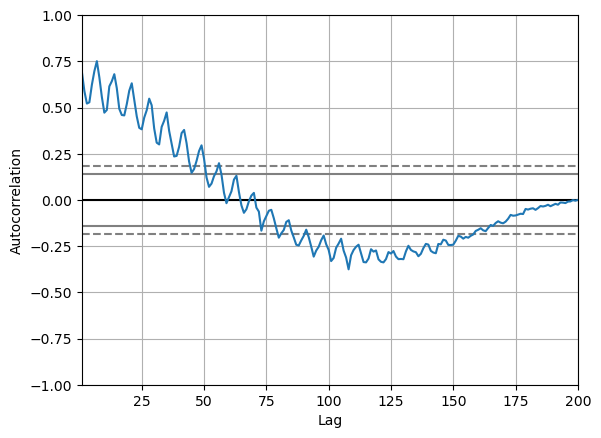

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(d1['courier_partners_online'])

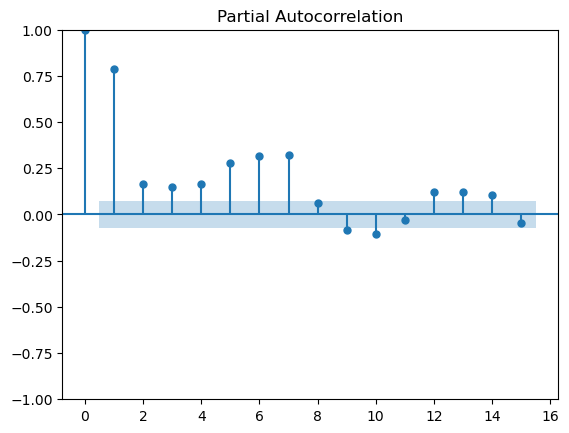

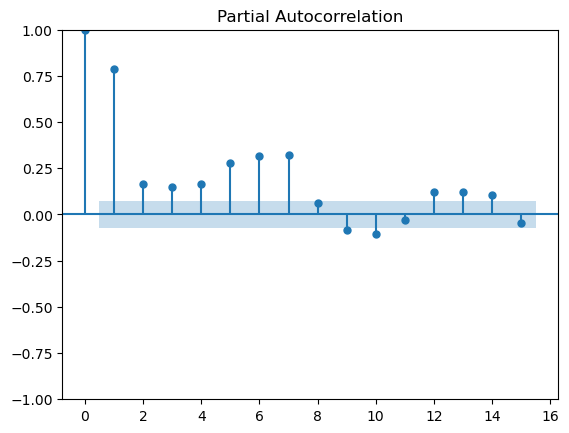

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['courier_partners_online'],lags=15)


In [29]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['courier_partners_online'],order =(5,0,1))
model=model.fit()

In [30]:
residuals = model.resid

<Axes: >

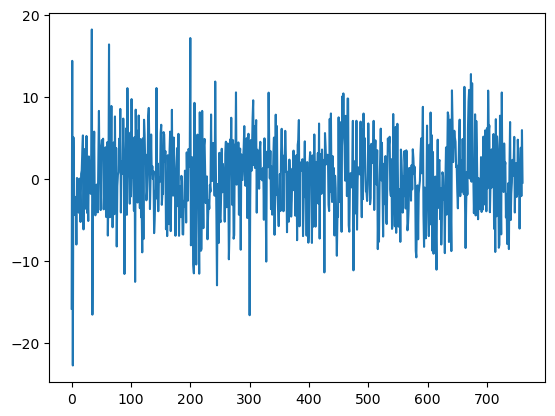

In [31]:
residuals.plot()

In [32]:
output = model.forecast()

In [33]:
model.forecast(14)

761    72.967491
762    72.884062
763    72.147283
764    73.932999
765    75.101593
766    75.004348
767    74.587086
768    73.803178
769    73.433713
770    73.594099
771    73.894675
772    74.133336
773    74.127149
774    73.931792
Name: predicted_mean, dtype: float64

# Autoregression Model

Training and testing the data

In [34]:
data.shape

(761, 8)

In [35]:
x =data['courier_partners_online'].values
x

array([49, 66, 40, 51, 50, 47, 49, 48, 42, 48, 48, 49, 46, 47, 46, 42, 47,
       49, 52, 55, 43, 46, 50, 45, 48, 54, 46, 46, 42, 48, 51, 51, 48, 50,
       66, 38, 41, 47, 53, 52, 47, 44, 45, 46, 45, 51, 58, 51, 49, 43, 49,
       55, 56, 58, 48, 46, 48, 54, 50, 52, 56, 45, 47, 66, 52, 48, 52, 58,
       56, 49, 49, 55, 50, 61, 54, 56, 46, 48, 53, 55, 61, 58, 62, 51, 53,
       56, 56, 65, 63, 46, 52, 55, 63, 58, 68, 62, 58, 57, 53, 63, 60, 70,
       64, 62, 59, 54, 64, 51, 67, 65, 67, 61, 56, 66, 64, 60, 67, 58, 57,
       52, 63, 57, 68, 70, 64, 64, 57, 57, 62, 71, 76, 71, 60, 59, 66, 67,
       70, 68, 66, 58, 57, 61, 64, 78, 68, 66, 59, 59, 64, 66, 73, 75, 64,
       61, 60, 69, 75, 73, 72, 60, 61, 58, 68, 71, 64, 69, 71, 60, 63, 73,
       67, 66, 71, 69, 67, 60, 61, 67, 72, 67, 72, 60, 61, 64, 61, 67, 67,
       59, 56, 58, 59, 65, 65, 58, 63, 60, 58, 65, 66, 65, 80, 59, 52, 61,
       61, 56, 52, 68, 63, 59, 50, 57, 65, 65, 60, 47, 61, 54, 50, 50, 63,
       60, 53, 59, 60, 58

In [36]:
len(x)

761

In [37]:
len(x) - 7

754

In [38]:
x[len(x) - 7:]

array([77, 68, 70, 76, 73, 81, 76], dtype=int64)

In [39]:
len(x[0:len(x)-7])

754

In [40]:
train,test = x[0:len(x)-7],x[len(x) - 7:]

In [41]:
train

array([49, 66, 40, 51, 50, 47, 49, 48, 42, 48, 48, 49, 46, 47, 46, 42, 47,
       49, 52, 55, 43, 46, 50, 45, 48, 54, 46, 46, 42, 48, 51, 51, 48, 50,
       66, 38, 41, 47, 53, 52, 47, 44, 45, 46, 45, 51, 58, 51, 49, 43, 49,
       55, 56, 58, 48, 46, 48, 54, 50, 52, 56, 45, 47, 66, 52, 48, 52, 58,
       56, 49, 49, 55, 50, 61, 54, 56, 46, 48, 53, 55, 61, 58, 62, 51, 53,
       56, 56, 65, 63, 46, 52, 55, 63, 58, 68, 62, 58, 57, 53, 63, 60, 70,
       64, 62, 59, 54, 64, 51, 67, 65, 67, 61, 56, 66, 64, 60, 67, 58, 57,
       52, 63, 57, 68, 70, 64, 64, 57, 57, 62, 71, 76, 71, 60, 59, 66, 67,
       70, 68, 66, 58, 57, 61, 64, 78, 68, 66, 59, 59, 64, 66, 73, 75, 64,
       61, 60, 69, 75, 73, 72, 60, 61, 58, 68, 71, 64, 69, 71, 60, 63, 73,
       67, 66, 71, 69, 67, 60, 61, 67, 72, 67, 72, 60, 61, 64, 61, 67, 67,
       59, 56, 58, 59, 65, 65, 58, 63, 60, 58, 65, 66, 65, 80, 59, 52, 61,
       61, 56, 52, 68, 63, 59, 50, 57, 65, 65, 60, 47, 61, 54, 50, 50, 63,
       60, 53, 59, 60, 58

In [42]:
test

array([77, 68, 70, 76, 73, 81, 76], dtype=int64)

In [43]:
train.shape

(754,)

In [44]:
test.shape

(7,)

In [45]:
from statsmodels.tsa.ar_model import AutoReg
AR = AutoReg(train,lags = 30)
AR_model_fit=AR.fit()


# Predicting the model

In [46]:
prediction = AR_model_fit.predict(start=len(train),end=len(train)+len(test)+14)
prediction

array([72.53353356, 69.88229833, 72.33988428, 73.92559998, 74.80219796,
       76.27615407, 75.78199726, 72.5191601 , 70.8821018 , 70.65856598,
       72.56964158, 74.19056925, 75.89565415, 75.82528036, 72.03086864,
       70.37675651, 71.34738177, 72.36581048, 74.04844251, 75.45680103,
       74.98591407, 72.34218257])

In [47]:
s=prediction[:7]
s

array([72.53353356, 69.88229833, 72.33988428, 73.92559998, 74.80219796,
       76.27615407, 75.78199726])

In [48]:
print(len(train))

754


In [49]:
print(len(test)-1)

6


In [50]:
print(len(train)+len(test)-1)

760


In [51]:
len(prediction)

22

In [52]:
len(s)

7

let's compare the prediced value and the expected value

In [53]:
for i in range (len(s)):
    print('predicted value',prediction[i] ,',','expected value',test[i])

predicted value 72.53353356475323 , expected value 77
predicted value 69.88229833272376 , expected value 68
predicted value 72.33988428111068 , expected value 70
predicted value 73.92559997829079 , expected value 76
predicted value 74.80219796307938 , expected value 73
predicted value 76.27615407160084 , expected value 81
predicted value 75.78199726413894 , expected value 76


In [54]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse=sqrt(mean_squared_error(test,s))
print("rmse  =:%.4f"% rmse )


rmse  =:2.9003


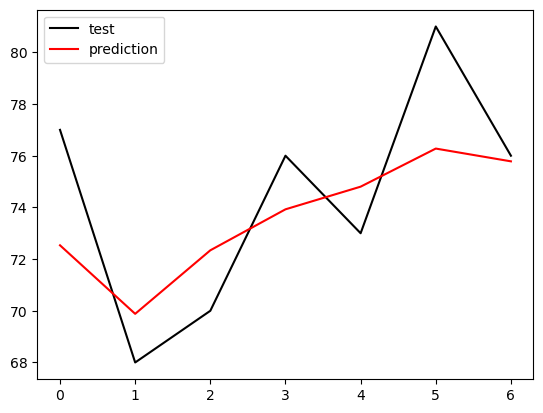

In [55]:
plt.plot(test,color='black',label='test')
plt.plot(s,color='red',label='prediction')
plt.legend()
plt.show()